# Econ 430: Homework1

#### Evan(Yixian) Chen

#### Import library

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import sympy
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import scipy.stats as st 

### Exercise 1

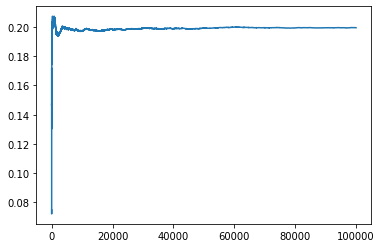

In [44]:
x_e1 = np.random.exponential(0.2, size=100000)
M_e1 = np.array([np.mean(x_e1[0:i+1]) for i in range(100000)])
plt.plot(M_e1)

From the plot, we can know that they are converging to 0.2.  
***
To calculate the speed of converging, I set a value named "err", use a for loop to find when the sequence can reach the range of [5-err,5+err].  

In [50]:
err = 0.001
for i in range(100000):
    if abs(M_e1[i]-0.2) < err and abs(M_e1[i+1]-0.2) < err:
        print("How quickly? Steps: ",i)
        break

How quickly? Steps:  164


### Exercise 2

(array([1306., 2717., 2721., 1832.,  873.,  372.,  125.,   41.,    9.,
           4.]),
 array([0.   , 0.045, 0.09 , 0.135, 0.18 , 0.225, 0.27 , 0.315, 0.36 ,
        0.405, 0.45 ]),
 <a list of 10 Patch objects>)

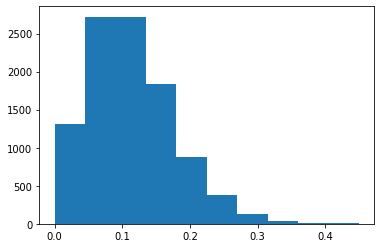

In [26]:
x_e2 = np.zeros([20,10000])
for i in range(20):
    x_e2[i,:] = np.random.binomial(10,0.01,size = 10000)
M_20 = np.array([np.mean(x_e2[:,i]) for i in range(10000)])
plt.hist(M_20, bins = 10)

This graph reaches the max point in 0.05. This graph firstly rise up and then drop down. There is little number of points when M_20 reaches 0.3.

### Exercise 3

#### (a)  
Question about (X1,...X9)'s distribution: what is the parameter of binomial?  1 or 9?  
I use np.random.binomial(1,0.4,size) to generate the sample. 

In [51]:
x_e3 = np.zeros([9,100000])
for i in range(9):
    x_e3[i,:] = np.random.binomial(1,0.4,size = 100000)
Y = np.sum(x_e3,axis = 0)
mostclose = 0
dict_close = {}
for i in range(int(min(Y)),int(max(Y)+1)):
    for j in range(int(min(Y)),int(max(Y)+1)):
        value_temp = np.shape(Y[Y<=i])[0]/100000 + np.shape(Y[Y>=j])[0]/100000
        if value_temp <= 0.1 and value_temp > mostclose:
            dict_close[value_temp] = [i,j]
            mostclose = value_temp
print("The best [c1,c2] is ",dict_close[max(dict_close.keys())])

The best [c1,c2] is  [1, 7]


#### (b)

In [53]:
print("The size of test is ",max(dict_close.keys()))

The size of test is  0.09340999999999999


#### (c)
The power function: Y<=1 and Y>= 7

Text(0.5, 1.0, 'Power funcition of p')

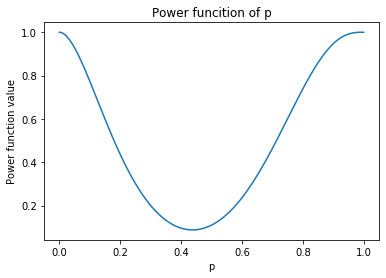

In [86]:
from scipy.special import comb
e3cx = np.linspace(0,1,1001)
e3result = np.zeros([1,1001])
for i in range(np.shape(e3cx)[0]):
    e3result[0,i] = sum([comb(9,j)*(e3cx[i]**j)*((1-e3cx[i])**(9-j)) for j in [0,1,7,8,9]])
plt.plot(e3cx, e3result[0,:])
plt.xlabel("p")
plt.ylabel("Power function value")
plt.title("Power funcition of p")

### Exercise 4

#### (a)

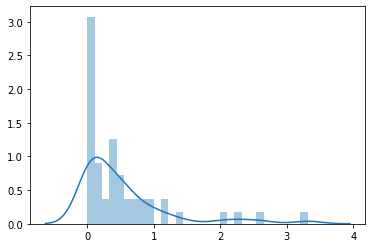

In [31]:
import seaborn as sns
e4b = np.loadtxt(r"C:\Users\chenyixian\Desktop\Homework\430\Prob4_data.txt")
sns.distplot(e4b,bins = 30)

#### (b)

In [32]:
e4b = np.loadtxt(r"C:\Users\Evan\Desktop\430\Prob4_data.txt")
alpha4 = sympy.symbols('alpha4')
beta4 = sympy.symbols('beta4')
sympy.solve([alpha4/beta4 - np.mean(e4b),alpha4/beta4**2 - np.std(e4b)**2],[alpha4,beta4])

[(0.580541866754351, 1.08184910505451)]

#### (c) 

In [35]:
e4b = np.loadtxt(r"C:\Users\Evan\Desktop\430\Prob4_data.txt")
sample4 = np.random.choice(e4b,1000,replace = True)
s4mean = bs.bootstrap(sample4, stat_func = bs_stats.mean)
s4std = bs.bootstrap(sample4, stat_func = bs_stats.std)
print("In bootstrap: \n mean is ",s4mean,"\nstd is ",s4std,"\n")

#95% confidence interval

cinternal = st.t.interval(1-0.05, len(sample4)-1, loc=np.mean(sample4), scale=st.sem(sample4))
print("95% confidence interval is ",cinternal)


In bootstrap: 
 mean is  0.505464    (0.46417980000000003, 0.5455867250000002) 
std is  0.6561415812947691    (0.6010869587411058, 0.7116586836137572) 

95% confidence interval is  (0.46472696682507714, 0.546201033174923)


The value of alpha and beta is smaller when I use bootstrap than the value when I use method moments.  
The difference of beta is large.

### Exercise 5

#### (a)

In [32]:
label_e5 = list(range(1,10001))
sample_a = random.sample(label_e5,500)

#### (b)

In [33]:
label_e5 = list(range(1,10001))
sample_b = []
for i in range(500):
    sample_b.append(random.sample(label_e5,1)[0])

I have a question.  
Is random.sample iid.? some articles tell that random.sample can satisify the requirement of iid.

### Excercise 6

#### (a)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1be899d68>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1be8a8438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1be899940>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1be8a8ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1be8a8e10>],
 'means': []}

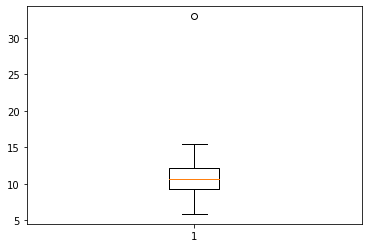

In [5]:
data30 = np.random.normal(10,2,size = 30)
data1 = np.random.normal(30,2,size = 1)
data31 = np.concatenate([data30,data1])
plt.boxplot(data31)

#### (b)

I notice that there are only one points outside the box, and the value of box is between 9 and 13.  
The value of line of boxplot is between 6 to 16.

#### (c)

I think the mean, the edge of box can measure the location of distribution,   
Because most values is in the box. The edge of box and the mean of it can show what these values are around.  

And the end of lines can measure the spread of the distribution. If the line is very long, it shows that the values' distribution and the spread is large. Else, it shows that the values' distribution and the spread is small.

### Exercise 7

Text(0.5, 1.0, 'Likelihood function line')

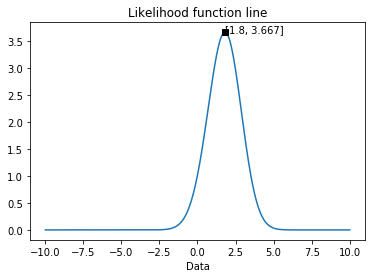

In [3]:
def expliki(theta):
    return np.exp(-(theta-1)**2/2)+3*np.exp(-(theta-2)**2/2)
datae7 = np.linspace(-10,10,1001)
datae7 = np.delete(datae7,[0])
mle = expliki(datae7)
max_mle = np.argmax(mle)
plt.plot(datae7,mle)
plt.plot(datae7[max_mle],mle[max_mle],'ks')
plt.annotate('['+str(round(datae7[max_mle],3))+', '+str(round(mle[max_mle],3))+']', xy=(datae7[max_mle],mle[max_mle]))
plt.xlabel("Data")
plt.title("Likelihood function line")

### Exercise 8

#### (a)

MLE, theta is  0.2


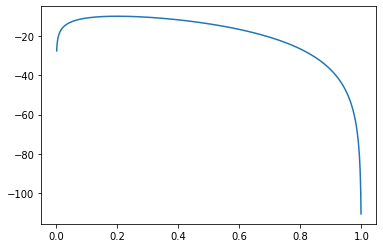

In [6]:
def e8(theta):
    return(4*np.log(theta)+16*np.log(1-theta))
datae8 = np.linspace(0,1,1001)
datae8 = np.delete(datae8,[0,1000])
e8data = e8(datae8)
plt.plot(datae8,e8data)
max_index = np.argmax(e8data)
print("MLE, theta is ",round(datae8[max_index],3))

#### (b)

MLE, THETA is  0.194


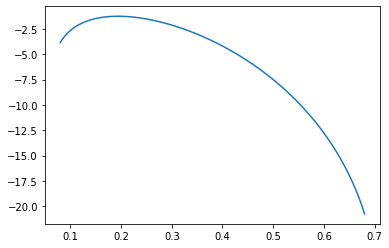

In [54]:
from scipy.special import comb
def e8b(theta):
    return np.log(comb(50*theta,4)*comb(50-50*theta,16)/comb(50,20))
datae8b = np.linspace(4/50,34/50,1000)
e8bdata = e8b(datae8b)
plt.plot(datae8b,e8bdata)
max_index = np.argmax(e8bdata)
print("MLE, THETA is ",round(datae8b[max_index],3))

### Exercise 9

In [9]:
def e9pro(size):
    e9sample = np.zeros([10000,size])
    for i in range(10000):
        e9sample[i,:] = np.random.normal(0,1,size = size)
    e9 = np.zeros([10000,2])
    for i in range(10000):
        e9[i,0] = np.mean(e9sample[i,:])-np.std(e9sample[i,:])/pow(size,0.5)
        e9[i,1] = np.mean(e9sample[i,:])+np.std(e9sample[i,:])/pow(size,0.5)
    pro = np.shape(e9[(e9[:,0]<0) & (e9[:,1]>0)])[0]/10000  
    print("With size ",size,", Proportion is ",pro)
e9pro(5)
e9pro(10)
e9pro(100)

With size  5 , Proportion is  0.5802
With size  10 , Proportion is  0.6332
With size  100 , Proportion is  0.6866


### Exercise 10

In [27]:
sample = [3.27,-1.24,3.97,2.25,3.47,-0.09,7.45,6.20,3.74,4.12,1.42,2.75,-1.48,4.97,8.00,3.26,0.15,-3.64,4.88,4.55]
#useing plut-in MLE
mu = np.mean(sample)
sigma = np.std(sample)
print("In plug-in MLE: \n mu is ",mu,"\nsigma is ",sigma,"\n")
#using bootstrapping

samples = np.random.choice(sample,1000,replace = True)
bootmean = bs.bootstrap(samples, stat_func = bs_stats.mean)
bootstd = bs.bootstrap(samples, stat_func = bs_stats.std)
print("In bootstrap: \n mean is ",bootmean,"\nstd is ",bootstd,"\n")

#95% confidence interval

mr = st.t.interval(1-0.05, len(samples)-1, loc=np.mean(samples), scale=st.sem(samples))
print("95% confidence interval is ",mr)

In plug-in MLE: 
 mu is  2.9 
sigma is  2.9214225986666156 

In bootstrap: 
 mean is  2.9605    (2.777695500000001, 3.1412715) 
std is  2.950489103521652    (2.8355049338147267, 3.070758646426798) 

95% confidence interval is  (2.7773167116383175, 3.1436832883616828)
